## Project - Predict the estimated time of arrival (ETA) for motorbike deliveries in Nairobi

### Background

Sendy was a logistics and fulfilment startup that provided services such as on-demand delivery, freight, warehousing, and fulfilment services to businesses and individuals.

It operated primarily in africa, with a huge presence in Kenya. Its main services included Sendy Transport, Sendy Freight, and Sendy Supply. 

It set itself apart by embeding technology to streamline its logistics processes. Most importantly, it used data analytics to improve operational efficiency and customer satisfaction.

The company, however, announced closure in August 2023 embarking on asset sales after being in existent since 2015.

### Project Objective

The primary objective of this project is to develop a predictive model that estimates the time of arrival (ETA) for orders placed on the Sendy platform. 

The ETA prediction will cover the period from pick-up to drop-off. The dataset provided by Sendy includes detailed order information and rider metrics based on orders made using Sendy's API, web, and mobile applications. 

These platforms connect customers with vetted transporters, offering route optimization and efficient dispatching of orders.

### Data Exploration and Preprocessing

In [334]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [335]:
# Load the Train data
TrainData = pd.read_csv('Datasets/Train.csv')

TrainData.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [336]:
# Load the Test data
TestData = pd.read_csv('Datasets/Test.csv')

TestData.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [337]:
# Load the Riders data
RidersData = pd.read_csv('Datasets/Riders.csv')

RidersData.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [338]:
# Dataset information
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [339]:
# Missing values - TrainData
TrainData.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [340]:
# Missing values - TestData
TestData.isnull().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                             1437
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destinatio

In [341]:
# Percentage of missing values - TrainData
round(TrainData.isnull().sum()/len(TrainData)*100,2)

Order No                                      0.00
User Id                                       0.00
Vehicle Type                                  0.00
Platform Type                                 0.00
Personal or Business                          0.00
Placement - Day of Month                      0.00
Placement - Weekday (Mo = 1)                  0.00
Placement - Time                              0.00
Confirmation - Day of Month                   0.00
Confirmation - Weekday (Mo = 1)               0.00
Confirmation - Time                           0.00
Arrival at Pickup - Day of Month              0.00
Arrival at Pickup - Weekday (Mo = 1)          0.00
Arrival at Pickup - Time                      0.00
Pickup - Day of Month                         0.00
Pickup - Weekday (Mo = 1)                     0.00
Pickup - Time                                 0.00
Arrival at Destination - Day of Month         0.00
Arrival at Destination - Weekday (Mo = 1)     0.00
Arrival at Destination - Time  

In [342]:
# Percentage of missing values - TestData
round(TestData.isnull().sum()/len(TestData)*100,2)

Order No                                 0.00
User Id                                  0.00
Vehicle Type                             0.00
Platform Type                            0.00
Personal or Business                     0.00
Placement - Day of Month                 0.00
Placement - Weekday (Mo = 1)             0.00
Placement - Time                         0.00
Confirmation - Day of Month              0.00
Confirmation - Weekday (Mo = 1)          0.00
Confirmation - Time                      0.00
Arrival at Pickup - Day of Month         0.00
Arrival at Pickup - Weekday (Mo = 1)     0.00
Arrival at Pickup - Time                 0.00
Pickup - Day of Month                    0.00
Pickup - Weekday (Mo = 1)                0.00
Pickup - Time                            0.00
Distance (KM)                            0.00
Temperature                             20.33
Precipitation in millimeters            97.18
Pickup Lat                               0.00
Pickup Long                       

We assume that the missing values in precipitation column is that no precipitation occurred at that time. Therefore, the missing values are filled with 0. 

In [343]:
# Inspecting the distribution of Temperature and Precipitation before imputing missing values

# Subplots
fig = make_subplots(rows = 1, cols = 2, subplot_titles = ('Temperature Distribution', 'Precipitation Distribution'))

# Temperature
fig.add_trace(go.Histogram(x = TrainData['Temperature'], marker_color = 'rgb(0, 0, 100)'), row = 1, col = 1)

# Precipitation
fig.add_trace(go.Histogram(x = TrainData['Precipitation in millimeters'], marker_color = 'rgb(0, 100, 0)'), row = 1, col = 2)

fig.update_layout(showlegend = False)

fig.show()

In [344]:
# Adding a new column - RainToday From the Precipitation column - If the precipitation column has a value greater than 0, then it rained that day, else it did not rain
TrainData['RainToday'] = np.where(TrainData['Precipitation in millimeters'] > 0, 'Yes', 'No')
TestData['RainToday'] = np.where(TestData['Precipitation in millimeters'] > 0, 'Yes', 'No')

In [345]:
# Using forward fill to impute missing values in the Temperature column
TrainData['Temperature'] = TrainData['Temperature'].fillna(method = 'ffill')
TestData['Temperature'] = TestData['Temperature'].fillna(method = 'ffill')

# Subplots
fig = make_subplots(rows = 1, cols = 2, subplot_titles = ('Temperature Distribution', 'Precipitation (millimeters) Distribution'))

# Temperature
fig.add_trace(go.Histogram(x = TrainData['Temperature'], marker_color = 'rgb(0, 0, 100)'), row = 1, col = 1)

# Precipitation
fig.add_trace(go.Histogram(x = TrainData['Precipitation in millimeters'], marker_color = 'rgb(0, 100, 0)'), row = 1, col = 2)

fig.update_layout(showlegend = False)

fig.show()

/var/folders/lm/s8zwrg211p924s4gpwmp06300000gn/T/ipykernel_13896/4198304476.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/var/folders/lm/s8zwrg211p924s4gpwmp06300000gn/T/ipykernel_13896/4198304476.py:3: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [346]:
# Checking Test Data after imputing missing values

# Subplots
fig = make_subplots(rows = 1, cols = 2, subplot_titles = ('Temperature Distribution', 'Rainy Days vs Non-Rainy Days Distribution'))

# Temperature
fig.add_trace(go.Histogram(x = TrainData['Temperature'], marker_color = 'rgb(0, 0, 100)'), row = 1, col = 1)

colors = ['rgb(100, 0, 0)', 'rgb(0, 100, 0)']  # Two colors for 'No' and 'Yes'

# Precipitation
fig.add_trace(go.Bar(x = TrainData['RainToday'].value_counts().index, y = TrainData['RainToday'].value_counts().values, marker_color = colors), row = 1, col = 2)
              
fig.update_layout(showlegend = False)

fig.show()

### Exploratory Data Analysis

array([[<Axes: title={'center': 'Platform Type'}>,
        <Axes: title={'center': 'Placement - Day of Month'}>,
        <Axes: title={'center': 'Placement - Weekday (Mo = 1)'}>,
        <Axes: title={'center': 'Confirmation - Day of Month'}>],
       [<Axes: title={'center': 'Confirmation - Weekday (Mo = 1)'}>,
        <Axes: title={'center': 'Arrival at Pickup - Day of Month'}>,
        <Axes: title={'center': 'Arrival at Pickup - Weekday (Mo = 1)'}>,
        <Axes: title={'center': 'Pickup - Day of Month'}>],
       [<Axes: title={'center': 'Pickup - Weekday (Mo = 1)'}>,
        <Axes: title={'center': 'Arrival at Destination - Day of Month'}>,
        <Axes: title={'center': 'Arrival at Destination - Weekday (Mo = 1)'}>,
        <Axes: title={'center': 'Distance (KM)'}>],
       [<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Precipitation in millimeters'}>,
        <Axes: title={'center': 'Pickup Lat'}>,
        <Axes: title={'center': 'Pickup Long'}>],


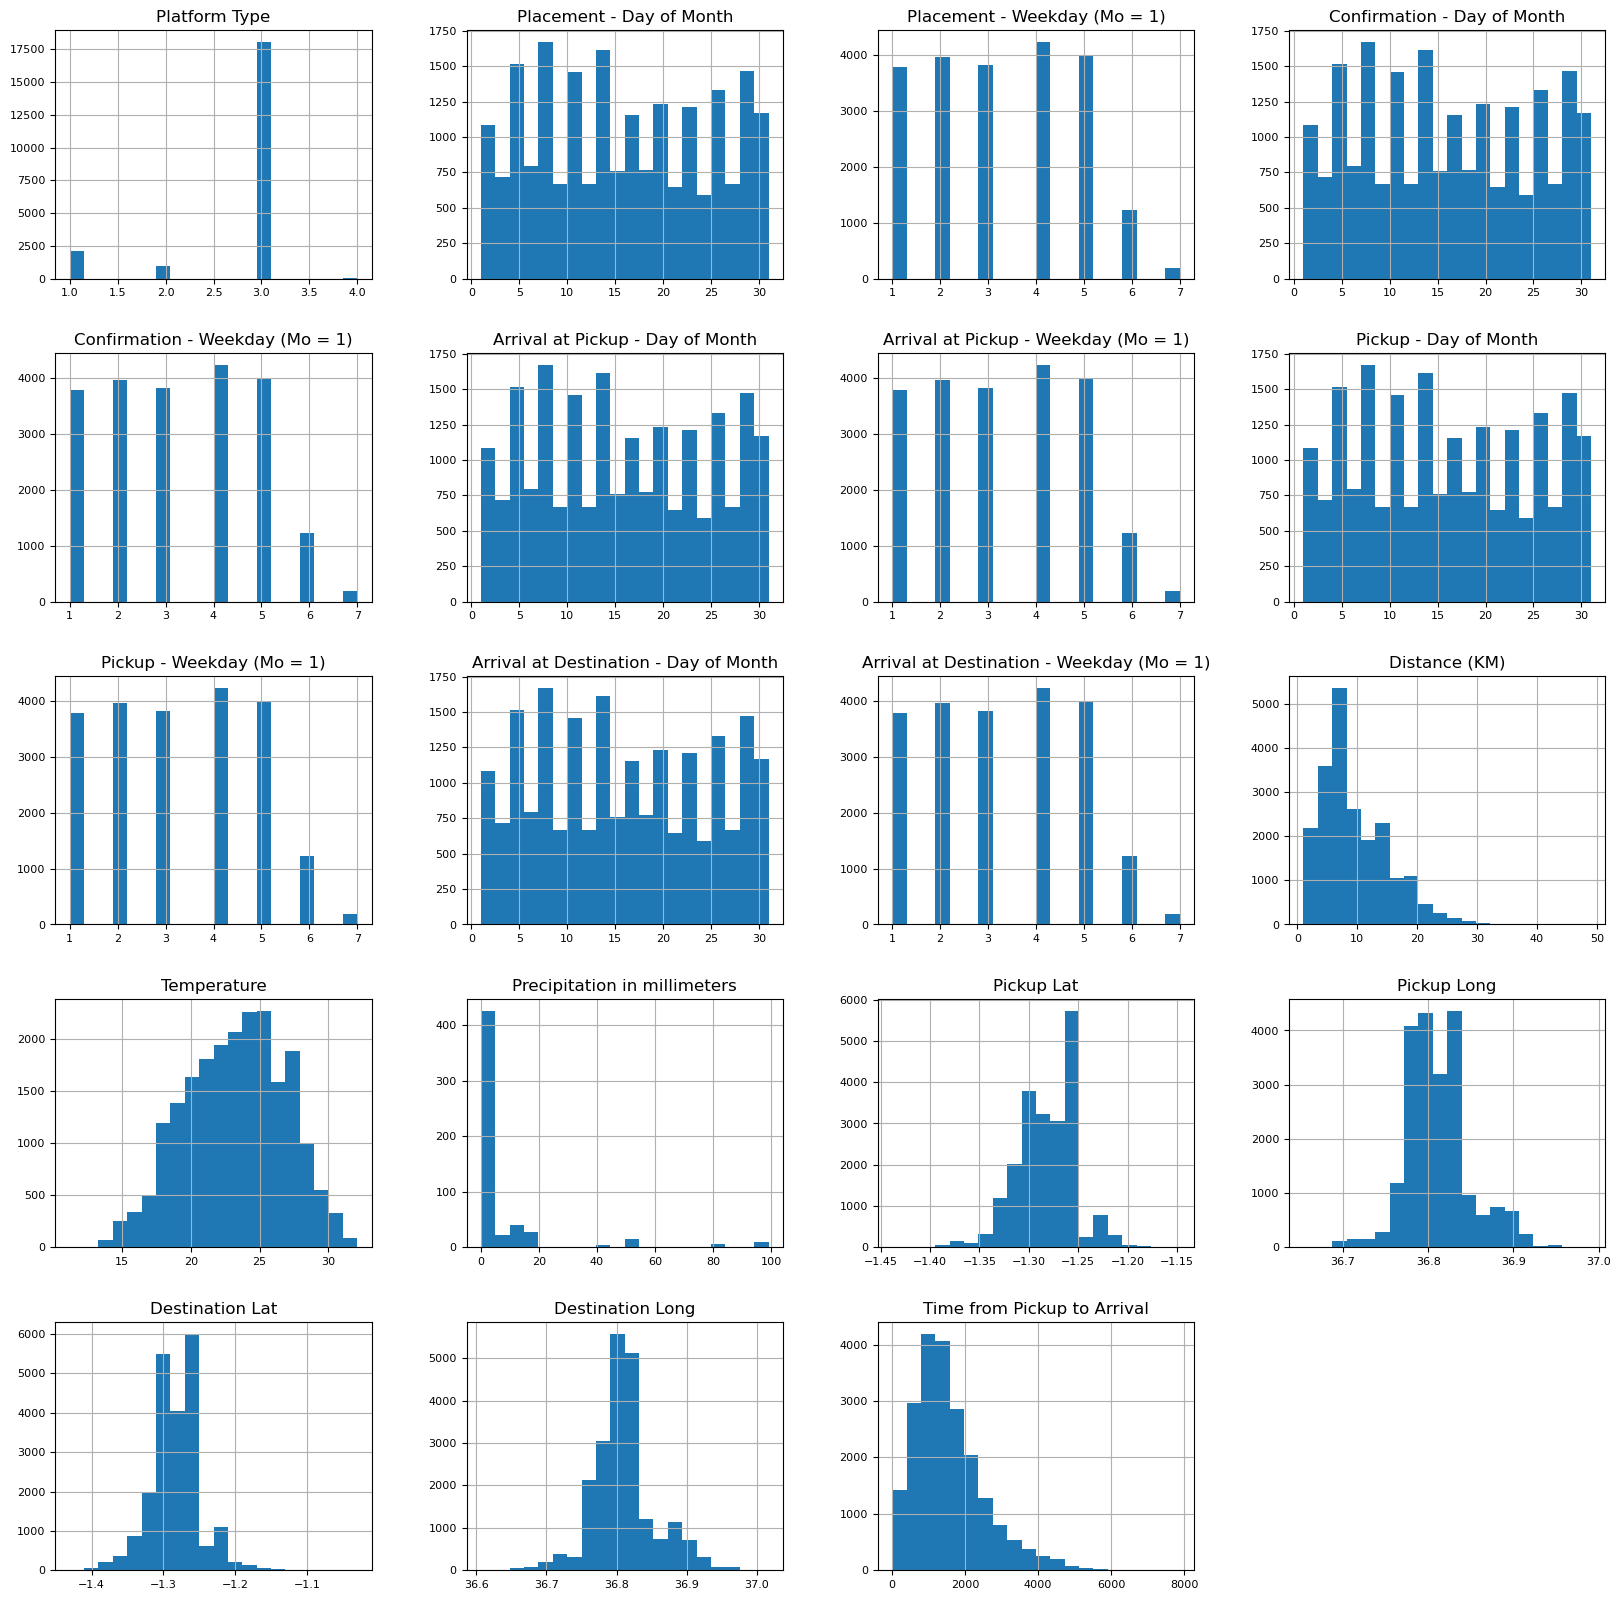

In [347]:
TrainData.hist(figsize = (20, 20), bins = 20, xlabelsize = 8, ylabelsize = 8)

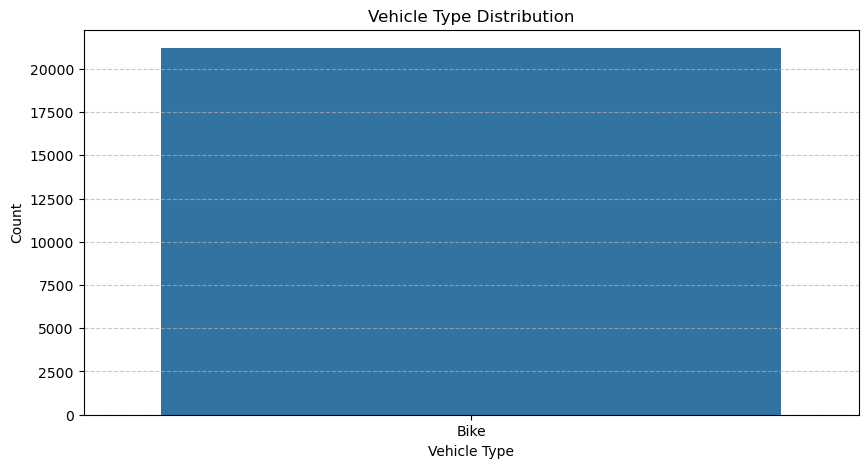

In [348]:
# Which vehicle type is used the most?

plt.figure(figsize = (10, 5))

sns.countplot(x = 'Vehicle Type', data = TrainData)
plt.title('Vehicle Type Distribution')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

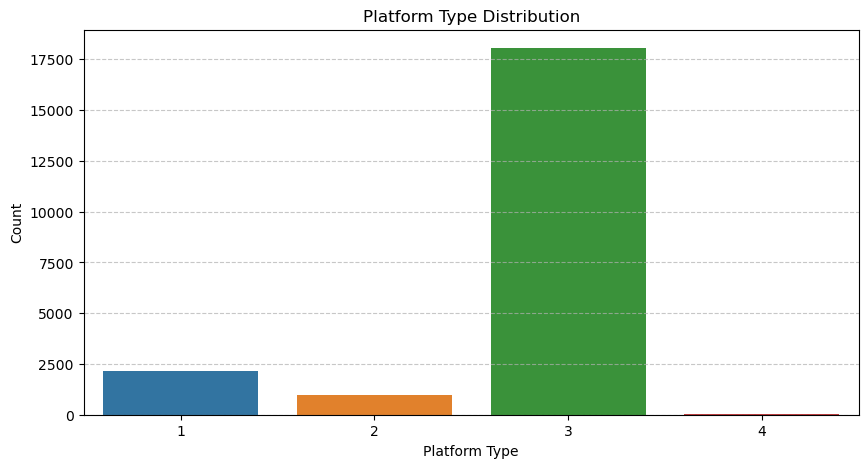

In [349]:
# What platforms are the most popular?

plt.figure(figsize = (10, 5))

sns.countplot(x = 'Platform Type', data = TrainData)
plt.title('Platform Type Distribution')
plt.xlabel('Platform Type')
plt.ylabel('Count')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

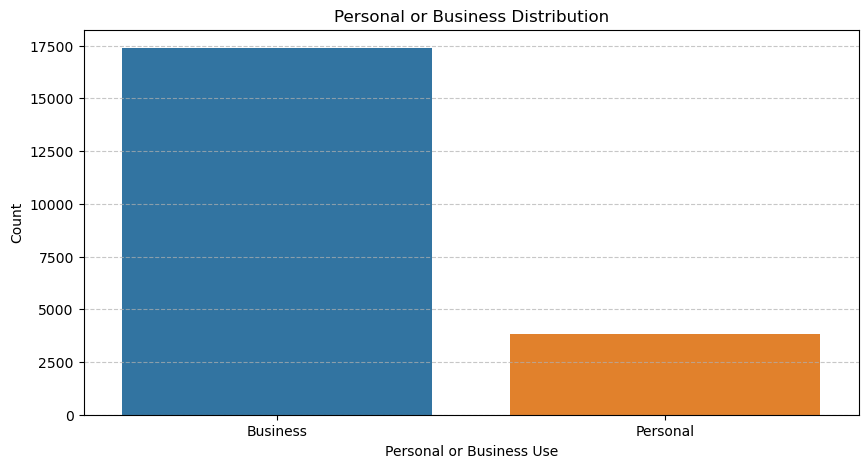

In [350]:
# Are the orders personal or business?

plt.figure(figsize = (10, 5))

sns.countplot(x = 'Personal or Business', data = TrainData)
plt.title('Personal or Business Distribution')
plt.xlabel('Personal or Business Use')
plt.ylabel('Count')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

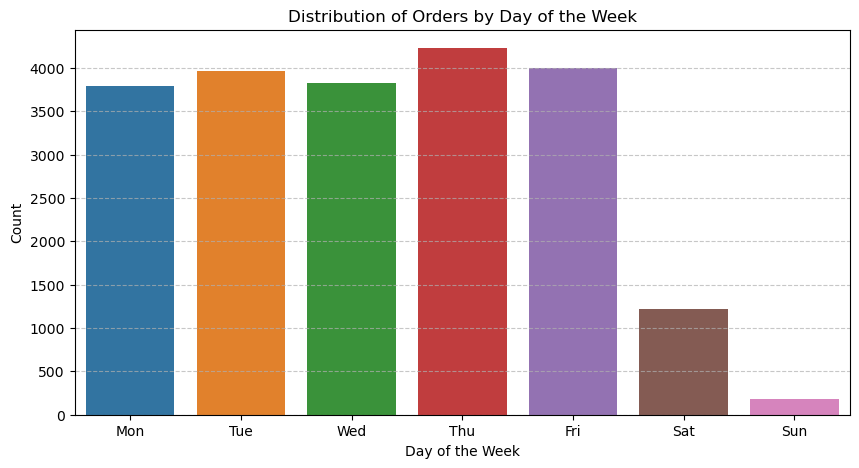

In [351]:
# How do orders vary with the day of the week?

plt.figure(figsize = (10, 5))

sns.countplot(x = 'Placement - Weekday (Mo = 1)', data = TrainData)
plt.title('Distribution of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')

plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6], 
           labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Add gridlines
plt.grid(axis = 'y', linestyle='--', alpha=0.7)

plt.show()

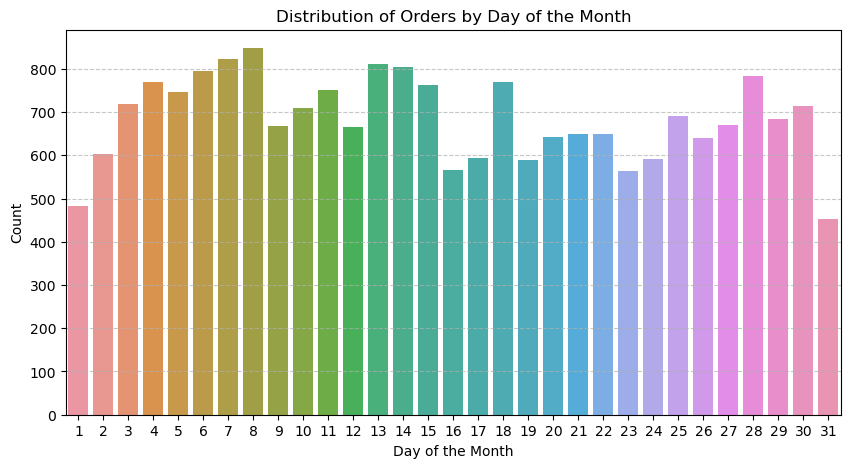

In [352]:
# What is the distribution of orders by day of the month?

plt.figure(figsize = (10, 5))

sns.countplot(x = 'Placement - Day of Month', data = TrainData)
plt.title('Distribution of Orders by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

In [353]:
# Joining the Rider data to the Train data on the 'Rider Id' column
TrainData = pd.merge(TrainData, RidersData, how = 'left', on = 'Rider Id')
TestData = pd.merge(TestData, RidersData, how = 'left', on = 'Rider Id')
TrainData.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,RainToday,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,36.830370,-1.300406,36.829741,Rider_Id_432,745,No,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,36.899315,-1.295004,36.814358,Rider_Id_856,1993,No,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,36.843419,-1.300921,36.828195,Rider_Id_155,455,No,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,36.832396,-1.257147,36.795063,Rider_Id_855,1341,No,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,36.792118,-1.295041,36.809817,Rider_Id_770,1214,No,2311,872,14.1,533


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



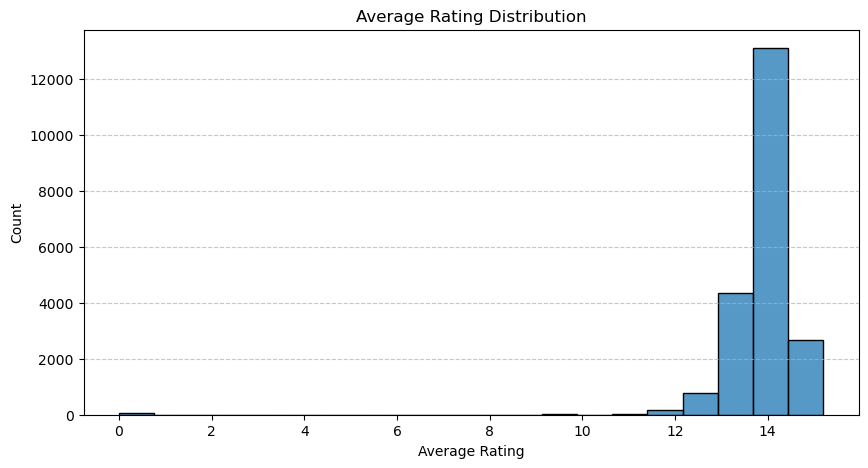

In [354]:
# What is the average rating of drivers?

plt.figure(figsize = (10, 5))

sns.histplot(TrainData['Average_Rating'], bins = 20)
plt.title('Average Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



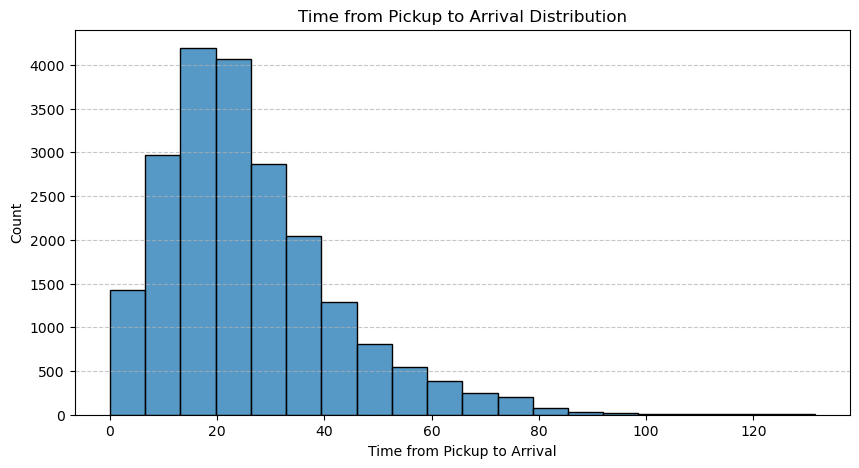

In [355]:
# What is the time taken to deliver orders?

# Adding a new column - Time from Pickup to Arrival in minutes
TrainData['Time from Pickup to Arrival - Minutes'] = TrainData['Time from Pickup to Arrival'] / 60

plt.figure(figsize = (10, 5))

sns.histplot(TrainData['Time from Pickup to Arrival - Minutes'], bins = 20)
plt.title('Time from Pickup to Arrival Distribution')
plt.xlabel('Time from Pickup to Arrival')
plt.ylabel('Count')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



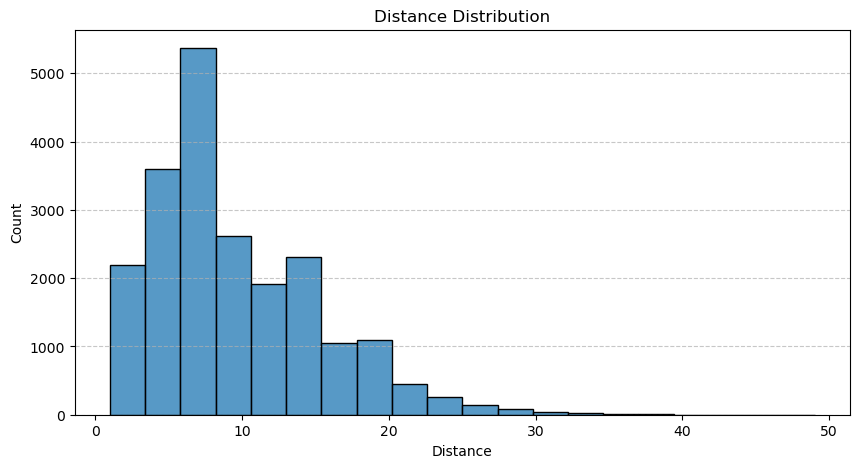

In [356]:
# What is the distance covered when delivering orders?

plt.figure(figsize = (10, 5))

sns.histplot(TrainData['Distance (KM)'], bins = 20)
plt.title('Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

In [357]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [358]:
TestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

In [359]:
# Adding new columns for hours

def extract_hours(df):
    """
    Extracts the hour from specific time columns in the dataframe.

    Args:
    df (pd.DataFrame): DataFrame containing the time columns.

    Returns:
    pd.DataFrame: DataFrame with new columns for the extracted hours.
    """
    # Columns to process and their respective new columns
    time_columns = {
        'Placement - Time': 'Placement - Hour',
        'Arrival at Destination - Time': 'Arrival at Destination - Hour',
        'Arrival at Pickup - Time': 'Arrival at Pickup - Hour',
        'Pickup - Time': 'Pickup - Hour',
        'Confirmation - Time': 'Confirmation - Hour'
    }
    
    for time_col, hour_col in time_columns.items():
        if time_col in df.columns:
            df[hour_col] = pd.to_datetime(df[time_col], format='%I:%M:%S %p').dt.hour

    return df


# Apply the function to the TrainData
TrainData = extract_hours(TrainData)

# Apply the function to the TestData
TestData = extract_hours(TestData)

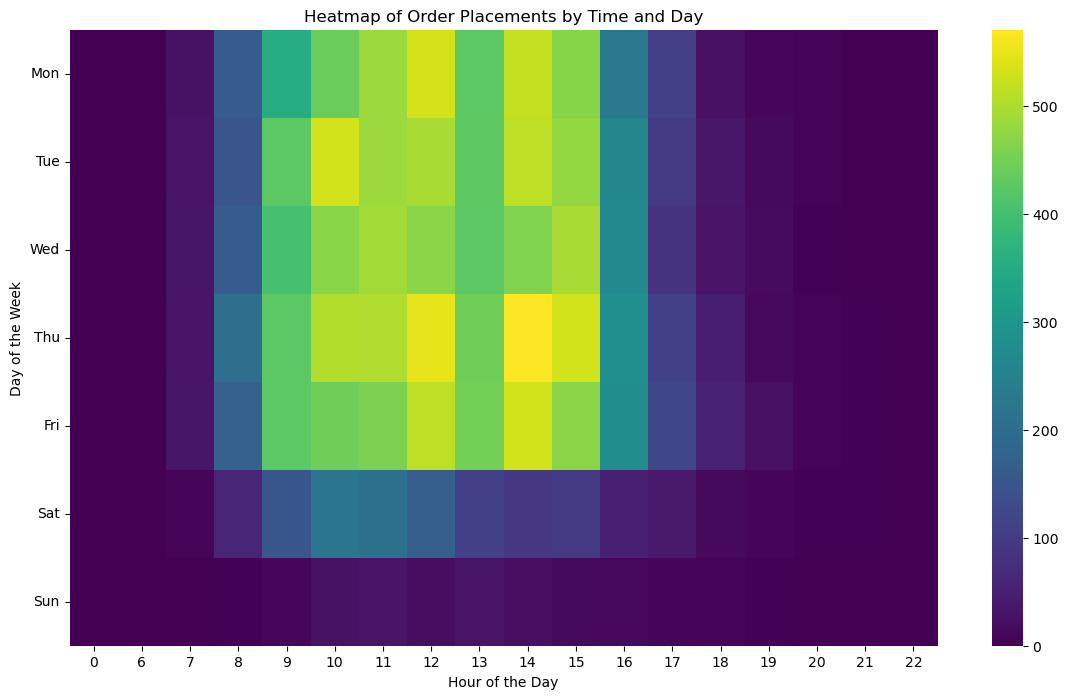

In [360]:
# What time of the day are orders placed?

# Pivot table for heatmap
heatmap_data = TrainData.pivot_table(index = 'Placement - Weekday (Mo = 1)', columns = 'Placement - Hour', aggfunc = 'size', fill_value = 0)

plt.figure(figsize = (14, 8))
sns.heatmap(heatmap_data, cmap = 'viridis', cbar = True)
plt.title('Heatmap of Order Placements by Time and Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.yticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], 
           labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation = 0)
plt.show()

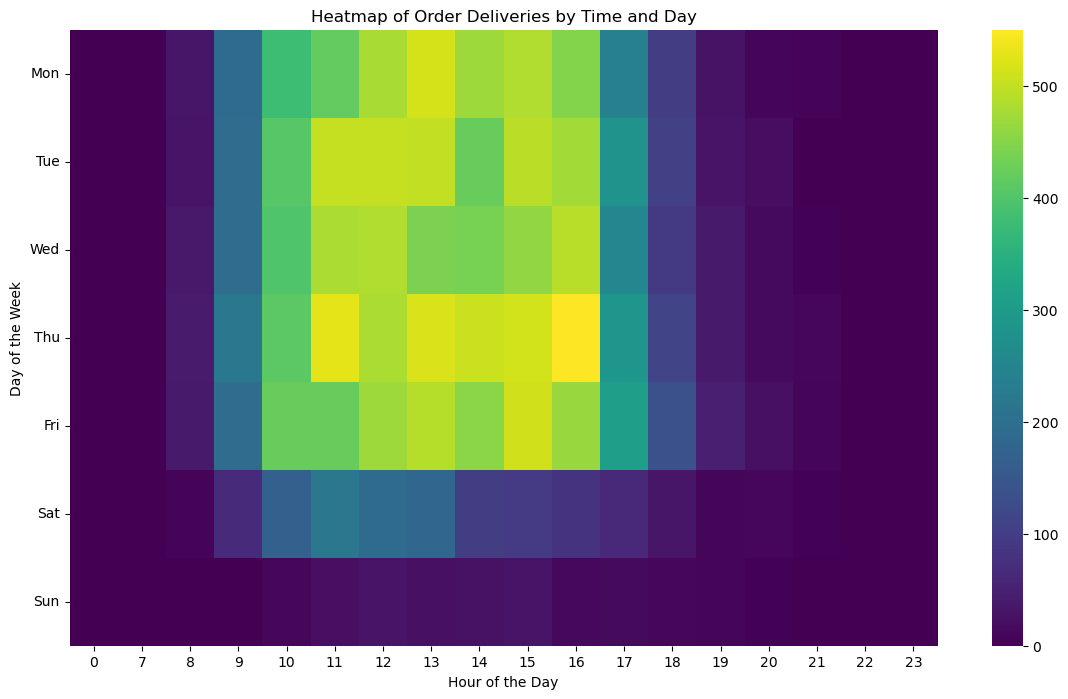

In [361]:
# What hour of the day are orders delivered?

# Pivot table for heatmap
heatmap_data = TrainData.pivot_table(index = 'Placement - Weekday (Mo = 1)', columns = 'Arrival at Destination - Hour', aggfunc = 'size', fill_value = 0)

plt.figure(figsize = (14, 8))
sns.heatmap(heatmap_data, cmap = 'viridis', cbar = True)
plt.title('Heatmap of Order Deliveries by Time and Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.yticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], 
           labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation = 0)
plt.show()

In [362]:
import pandas as pd

def generate_additional_features(df):
    """
    Generate additional features from the time columns.

    Args:
    df (pd.DataFrame): DataFrame containing the time columns.

    Returns:
    pd.DataFrame: DataFrame with additional features.
    """
    
    # Extract day of the week
    df['Placement - Day of Week'] = pd.to_datetime(df['Placement - Time'], format='%I:%M:%S %p').dt.dayofweek
    if 'Arrival at Destination - Time' in df.columns:
        df['Arrival at Destination - Day of Week'] = pd.to_datetime(df['Arrival at Destination - Time'], format='%I:%M:%S %p').dt.dayofweek
    df['Arrival at Pickup - Day of Week'] = pd.to_datetime(df['Arrival at Pickup - Time'], format='%I:%M:%S %p').dt.dayofweek
    df['Pickup - Day of Week'] = pd.to_datetime(df['Pickup - Time'], format='%I:%M:%S %p').dt.dayofweek
    df['Confirmation - Day of Week'] = pd.to_datetime(df['Confirmation - Time'], format='%I:%M:%S %p').dt.dayofweek
    
    # Is weekend
    df['Placement - Is Weekend'] = df['Placement - Day of Week'].isin([5, 6]).astype(int)
    if 'Arrival at Destination - Time' in df.columns:
        df['Arrival at Destination - Is Weekend'] = df['Arrival at Destination - Day of Week'].isin([5, 6]).astype(int)
    df['Arrival at Pickup - Is Weekend'] = df['Arrival at Pickup - Day of Week'].isin([5, 6]).astype(int)
    df['Pickup - Is Weekend'] = df['Pickup - Day of Week'].isin([5, 6]).astype(int)
    df['Confirmation - Is Weekend'] = df['Confirmation - Day of Week'].isin([5, 6]).astype(int)
    
    # Is peak hour (assuming peak hours are 7-9 AM and 4-6 PM)
    peak_hours = [7, 8, 9, 16, 17, 18]
    df['Placement - Is Peak Hour'] = df['Placement - Hour'].isin(peak_hours).astype(int)
    if 'Arrival at Destination - Time' in df.columns:
        df['Arrival at Destination - Is Peak Hour'] = df['Arrival at Destination - Hour'].isin(peak_hours).astype(int)
    df['Arrival at Pickup - Is Peak Hour'] = df['Arrival at Pickup - Hour'].isin(peak_hours).astype(int)
    df['Pickup - Is Peak Hour'] = df['Pickup - Hour'].isin(peak_hours).astype(int)
    df['Confirmation - Is Peak Hour'] = df['Confirmation - Hour'].isin(peak_hours).astype(int)
    
    # Time differences
    df['Time from Placement to Pickup'] = (pd.to_datetime(df['Pickup - Time'], format='%I:%M:%S %p') - pd.to_datetime(df['Placement - Time'], format='%I:%M:%S %p')).dt.total_seconds() / 60
    df['Time from Confirmation to Pickup'] = (pd.to_datetime(df['Pickup - Time'], format='%I:%M:%S %p') - pd.to_datetime(df['Confirmation - Time'], format='%I:%M:%S %p')).dt.total_seconds() / 60
    df['Time from Placement to Confirmation'] = (pd.to_datetime(df['Confirmation - Time'], format='%I:%M:%S %p') - pd.to_datetime(df['Placement - Time'], format='%I:%M:%S %p')).dt.total_seconds() / 60
    
    # Extract month
    df['Placement - Month'] = pd.to_datetime(df['Placement - Time'], format='%I:%M:%S %p').dt.month
    if 'Arrival at Destination - Time' in df.columns:
        df['Arrival at Destination - Month'] = pd.to_datetime(df['Arrival at Destination - Time'], format='%I:%M:%S %p').dt.month
    df['Arrival at Pickup - Month'] = pd.to_datetime(df['Arrival at Pickup - Time'], format='%I:%M:%S %p').dt.month
    df['Pickup - Month'] = pd.to_datetime(df['Pickup - Time'], format='%I:%M:%S %p').dt.month
    df['Confirmation - Month'] = pd.to_datetime(df['Confirmation - Time'], format='%I:%M:%S %p').dt.month
    
    return df

# Apply the function to the TrainData
TrainData = generate_additional_features(TrainData)

# Apply the function to the TestData
TestData = generate_additional_features(TestData)

In [363]:
TestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

In [364]:
# T-Tests for numerical columns

from scipy.stats import ttest_ind

# Perform the t-test
num_cols = TrainData.select_dtypes(include = ['int64', 'float64', 'int32', 'float32']).columns

for var in num_cols:
    if var in TrainData.columns:
        # Create two groups based on the median of the target variable
        median_time = TrainData['Time from Pickup to Arrival'].median()
        group1 = TrainData[TrainData['Time from Pickup to Arrival'] <= median_time][var]
        group2 = TrainData[TrainData['Time from Pickup to Arrival'] > median_time][var]
        # Perform t-test
        t_stat, p_val = ttest_ind(group1, group2)
        print(f'T-test for {var}: t-statistic = {t_stat}, p-value = {p_val}')

T-test for Platform Type: t-statistic = 0.2004561665469504, p-value = 0.8411257591562202
T-test for Placement - Day of Month: t-statistic = 1.8049645425879395, p-value = 0.07109441433934953
T-test for Placement - Weekday (Mo = 1): t-statistic = -0.8248592990414435, p-value = 0.4094607571532458
T-test for Confirmation - Day of Month: t-statistic = 1.802628340625434, p-value = 0.07146079998669146
T-test for Confirmation - Weekday (Mo = 1): t-statistic = -0.8380419469334393, p-value = 0.4020165937282001
T-test for Arrival at Pickup - Day of Month: t-statistic = 1.802628340625434, p-value = 0.07146079998669146
T-test for Arrival at Pickup - Weekday (Mo = 1): t-statistic = -0.8380419469334393, p-value = 0.4020165937282001
T-test for Pickup - Day of Month: t-statistic = 1.802628340625434, p-value = 0.07146079998669146
T-test for Pickup - Weekday (Mo = 1): t-statistic = -0.8380419469334393, p-value = 0.4020165937282001
T-test for Arrival at Destination - Day of Month: t-statistic = 1.80262834

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



In [365]:
# Chi-Square Test for categorical columns

from scipy.stats import chi2_contingency

cat_cols = TrainData.select_dtypes(include = 'object')

# Perform the chi-square test
for var in cat_cols:
    if var in TrainData.columns:
        # Create a contingency table
        contingency_table = pd.crosstab(TrainData['Time from Pickup to Arrival'], TrainData[var])
        # Perform chi-square test
        chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
        print(f'Chi-square test for {var}: chi2-statistic = {chi2_stat}, p-value = {p_val}')

Chi-square test for Order No: chi2-statistic = 86203266.00000273, p-value = 0.37838806273276243
Chi-square test for User Id: chi2-statistic = 12799137.867439294, p-value = 1.0
Chi-square test for Vehicle Type: chi2-statistic = 0.0, p-value = 1.0
Chi-square test for Personal or Business: chi2-statistic = 4011.122980765633, p-value = 0.7270456116887665
Chi-square test for Placement - Time: chi2-statistic = 63728016.6105773, p-value = 0.9999854029179949
Chi-square test for Confirmation - Time: chi2-statistic = 63624972.475920916, p-value = 1.0
Chi-square test for Arrival at Pickup - Time: chi2-statistic = 64124535.94132376, p-value = 0.03882990568194138
Chi-square test for Pickup - Time: chi2-statistic = 63904814.95704783, p-value = 5.711786946989821e-24
Chi-square test for Arrival at Destination - Time: chi2-statistic = 63959029.12138123, p-value = 0.0127977376133894
Chi-square test for Rider Id: chi2-statistic = 4083014.3690508627, p-value = 0.0
Chi-square test for RainToday: chi2-stati

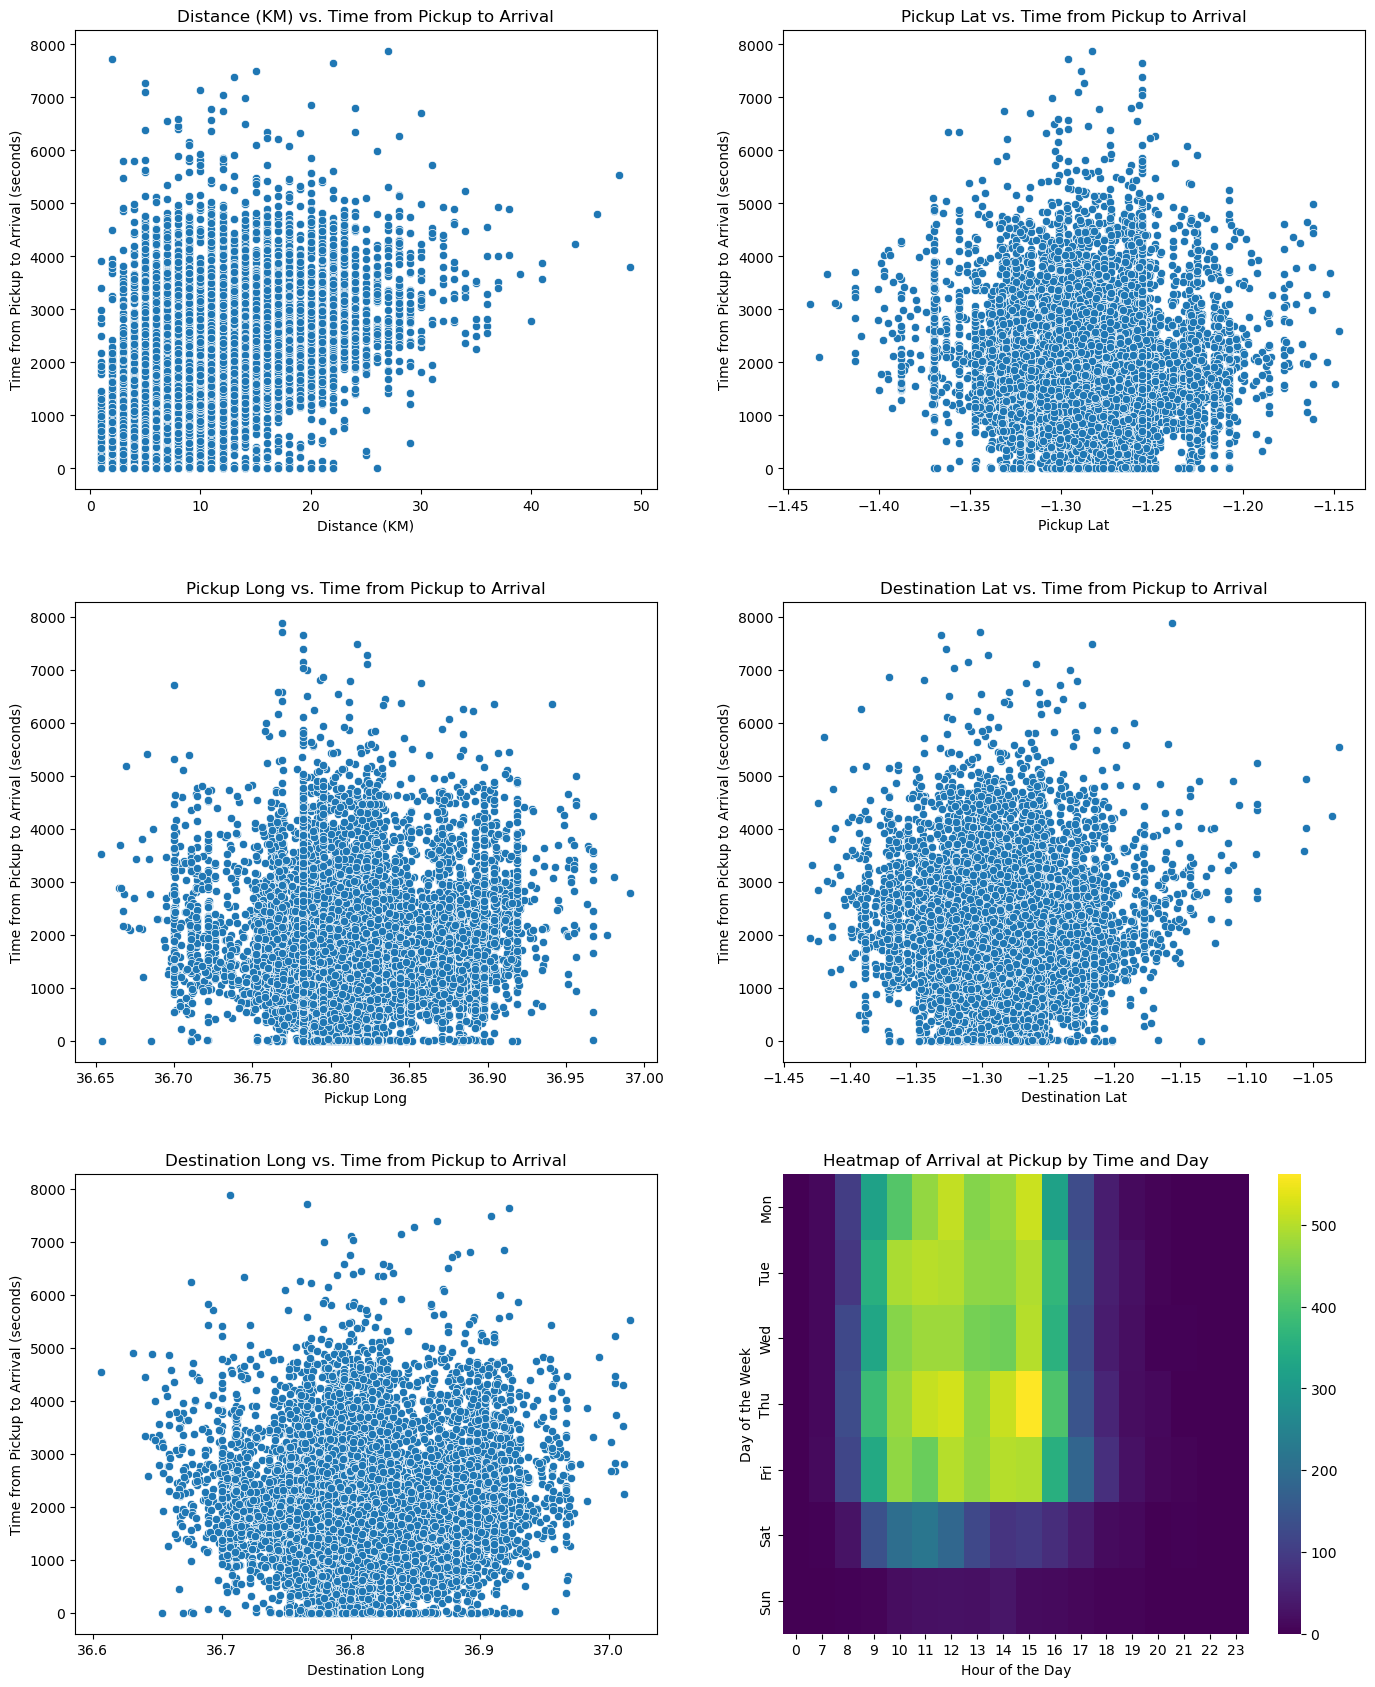

In [366]:
# Understanding and exploring key variables in the dataset

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 18))
fig.tight_layout(pad = 6.0)

# Distance (KM) vs. Time from Pickup to Arrival
sns.scatterplot(x = 'Distance (KM)', y = 'Time from Pickup to Arrival', data = TrainData, ax = axes[0, 0])
axes[0, 0].set_title('Distance (KM) vs. Time from Pickup to Arrival')
axes[0, 0].set_xlabel('Distance (KM)')
axes[0, 0].set_ylabel('Time from Pickup to Arrival (seconds)')

# Pickup Lat vs. Time from Pickup to Arrival
sns.scatterplot(x = 'Pickup Lat', y = 'Time from Pickup to Arrival', data = TrainData, ax = axes[0, 1])
axes[0, 1].set_title('Pickup Lat vs. Time from Pickup to Arrival')
axes[0, 1].set_xlabel('Pickup Lat')
axes[0, 1].set_ylabel('Time from Pickup to Arrival (seconds)')

# Pickup Long vs. Time from Pickup to Arrival
sns.scatterplot(x = 'Pickup Long', y = 'Time from Pickup to Arrival', data = TrainData, ax = axes[1, 0])
axes[1, 0].set_title('Pickup Long vs. Time from Pickup to Arrival')
axes[1, 0].set_xlabel('Pickup Long')
axes[1, 0].set_ylabel('Time from Pickup to Arrival (seconds)')

# Destination Lat vs. Time from Pickup to Arrival
sns.scatterplot(x = 'Destination Lat', y = 'Time from Pickup to Arrival', data = TrainData, ax = axes[1, 1])
axes[1, 1].set_title('Destination Lat vs. Time from Pickup to Arrival')
axes[1, 1].set_xlabel('Destination Lat')
axes[1, 1].set_ylabel('Time from Pickup to Arrival (seconds)')

# Destination Long vs. Time from Pickup to Arrival
sns.scatterplot(x = 'Destination Long', y = 'Time from Pickup to Arrival', data = TrainData, ax = axes[2, 0])
axes[2, 0].set_title('Destination Long vs. Time from Pickup to Arrival')
axes[2, 0].set_xlabel('Destination Long')
axes[2, 0].set_ylabel('Time from Pickup to Arrival (seconds)')

# Heatmap of Arrival at Pickup - Time
TrainData['Arrival at Pickup - Hour'] = pd.to_datetime(TrainData['Arrival at Pickup - Time'], format = '%I:%M:%S %p').dt.hour

# Pivot table for heatmap
heatmap_data = TrainData.pivot_table(index = 'Placement - Weekday (Mo = 1)', columns = 'Arrival at Pickup - Hour', aggfunc = 'size', fill_value = 0)

sns.heatmap(heatmap_data, cmap = 'viridis', cbar = True, ax = axes[2, 1])
axes[2, 1].set_title('Heatmap of Arrival at Pickup by Time and Day')
axes[2, 1].set_xlabel('Hour of the Day')
axes[2, 1].set_ylabel('Day of the Week')
axes[2, 1].set_yticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], 
                      labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.show()


In [367]:
TrainData.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Is Peak Hour,Confirmation - Is Peak Hour,Time from Placement to Pickup,Time from Confirmation to Pickup,Time from Placement to Confirmation,Placement - Month,Arrival at Destination - Month,Arrival at Pickup - Month,Pickup - Month,Confirmation - Month
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,0,1,51.733333,47.333333,4.400000,1,1,1,1,1
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,0,0,27.883333,20.800000,7.083333,1,1,1,1,1
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,0,0,13.633333,10.316667,3.316667,1,1,1,1,1
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,1,1,17.533333,17.016667,0.516667,1,1,1,1,1
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,0,1,10.083333,9.083333,1.000000,1,1,1,1,1


In [368]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 63 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [369]:
TrainData_copy = TrainData.copy()

In [370]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Label encode the categorical columns except Order No
for col in TrainData_copy.columns:
    if TrainData_copy[col].dtype == 'object' and col != 'Order No':
        TrainData_copy[col] = le.fit_transform(TrainData_copy[col])

In [371]:
# Missing values grouped per column
missing_values = TrainData_copy.isnull().sum()

missing_values

Order No                          0
User Id                           0
Vehicle Type                      0
Platform Type                     0
Personal or Business              0
                                 ..
Placement - Month                 0
Arrival at Destination - Month    0
Arrival at Pickup - Month         0
Pickup - Month                    0
Confirmation - Month              0
Length: 63, dtype: int64

In [372]:
# Performing a feature selection - Boruta Algorithm

from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

# Define the features and target
X = TrainData_copy.drop(['Time from Pickup to Arrival', 'Arrival at Destination - Time', 'Arrival at Destination - Day of Week', 'Arrival at Destination - Is Weekend', 'Arrival at Destination - Is Peak Hour', 'Arrival at Destination - Month', 'Order No', 'Precipitation in millimeters', 'Time from Pickup to Arrival - Minutes'], axis = 1)
y = TrainData_copy['Time from Pickup to Arrival']

# Define the random forest regressor
rf = RandomForestRegressor(n_jobs = -1)

# Define the Boruta feature selection method
boruta = BorutaPy(estimator = rf, n_estimators = 'auto', max_iter = 100, random_state = 1)

# Perform the Boruta feature selection
try:
    boruta.fit(X.values, y.values)
except AttributeError as e:
    print(f"Error: {e}")
    print("Trying to use built-in int type.")
    # A workaround if BorutaPy still uses np.int somewhere
    import numpy as np
    np.float = float  # Overwrite np.float to be float
    np.bool = bool  # Overwrite np.bool to be bool
    np.int = int  # Overwrite np.int to be int
    boruta.fit(X.values, y.values)


# Get the selected features
selected_features = X.columns[boruta.support_].to_list()
selected_features

['Pickup - Time',
 'Distance (KM)',
 'Destination Lat',
 'Destination Long',
 'No_Of_Orders',
 'Age',
 'Arrival at Destination - Hour',
 'Time from Confirmation to Pickup',
 'Time from Placement to Confirmation']

In [373]:
TestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

In [396]:
# Selecting the key features for the model

# Define the list of key features (excluding the target)
key_features = [
    'Distance (KM)', 'RainToday', 'Pickup Lat', 'Pickup Long', 'Destination Lat',
    'Destination Long', 'Average_Rating', 'No_Of_Orders', 'Age',
    'Arrival at Pickup - Hour', 'Time from Confirmation to Pickup', 'Time from Placement to Confirmation', 'Rider Id'
]

# Target variable
target = 'Time from Pickup to Arrival'

# Ensure the key features and target are in the TrainData
missing_train_features = [feature for feature in key_features + [target] if feature not in TrainData_copy.columns]
if missing_train_features:
    raise ValueError(f"Missing features in TrainData: {missing_train_features}")

# Ensure the key features are in the TestData
missing_test_features = [feature for feature in key_features if feature not in TestData.columns]
if missing_test_features:
    raise ValueError(f"Missing features in TestData: {missing_test_features}")

TrainDataModel = pd.DataFrame(TrainData_copy[key_features + [target]].copy())
TestDataModel = pd.DataFrame(TestData[key_features].copy())

In [397]:
TrainDataModel.head()

,Distance (KM),RainToday,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Average_Rating,No_Of_Orders,Age,Arrival at Pickup - Hour,Time from Confirmation to Pickup,Time from Placement to Confirmation,Rider Id,Time from Pickup to Arrival
0,4,0,-1.317755,36.830370,-1.300406,36.829741,13.8,1637,1309,10,47.333333,4.400000,362,745
1,16,0,-1.351453,36.899315,-1.295004,36.814358,13.6,396,339,11,20.800000,7.083333,812,1993
2,3,0,-1.308284,36.843419,-1.300921,36.828195,12.5,1023,242,12,10.316667,3.316667,61,455
3,9,0,-1.281301,36.832396,-1.257147,36.795063,14.5,886,283,9,17.016667,0.516667,811,1341
4,9,0,-1.266597,36.792118,-1.295041,36.809817,14.1,2311,872,10,9.083333,1.000000,720,1214


In [391]:
TestDataModel.head()

,Distance (KM),RainToday,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Average_Rating,No_Of_Orders,Age,Arrival at Pickup - Hour,Time from Confirmation to Pickup,Time from Placement to Confirmation,Rider Id
0,8,No,-1.333275,36.870815,-1.305249,36.822390,13.3,439,1511,16,22.300000,0.316667,Rider_Id_192
1,5,No,-1.272639,36.794723,-1.277007,36.823907,14.4,488,273,13,26.333333,1.700000,Rider_Id_868
2,5,No,-1.290894,36.822971,-1.276574,36.851365,13.1,833,460,11,32.816667,16.850000,Rider_Id_26
3,5,No,-1.290503,36.809646,-1.303382,36.790658,13.7,487,560,14,23.416667,1.866667,Rider_Id_685
4,6,No,-1.281081,36.814423,-1.266467,36.792161,14.1,4761,1120,11,21.316667,4.283333,Rider_Id_858


In [398]:
# Label Encoding categorical columns in TestDataModel
for col in TestDataModel.columns:
    if TestDataModel[col].dtype == 'object':
        TestDataModel[col] = le.fit_transform(TestDataModel[col])

TestDataModel.head()

,Distance (KM),RainToday,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Average_Rating,No_Of_Orders,Age,Arrival at Pickup - Hour,Time from Confirmation to Pickup,Time from Placement to Confirmation,Rider Id
0,8,0,-1.333275,36.870815,-1.305249,36.822390,13.3,439,1511,16,22.300000,0.316667,85
1,5,0,-1.272639,36.794723,-1.277007,36.823907,14.4,488,273,13,26.333333,1.700000,734
2,5,0,-1.290894,36.822971,-1.276574,36.851365,13.1,833,460,11,32.816667,16.850000,153
3,5,0,-1.290503,36.809646,-1.303382,36.790658,13.7,487,560,14,23.416667,1.866667,562
4,6,0,-1.281081,36.814423,-1.266467,36.792161,14.1,4761,1120,11,21.316667,4.283333,726


In [399]:
# Standardizing the train data except the target variable and test data

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the TrainDataModel except the target variable
TrainDataModel.iloc[:, :-1] = scaler.fit_transform(TrainDataModel.iloc[:, :-1])

# Standardize the TestDataModel
TestDataModel.iloc[:, :] = scaler.transform(TestDataModel.iloc[:, :])

TrainDataModel.head()

,Distance (KM),RainToday,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Average_Rating,No_Of_Orders,Age,Arrival at Pickup - Hour,Time from Confirmation to Pickup,Time from Placement to Confirmation,Rider Id,Time from Pickup to Arrival
0,-0.971370,-0.163501,-1.189424,0.509897,-0.511888,0.414159,-0.090082,-0.035206,0.501451,-1.041024,1.348395,-0.164988,-0.360761,745
1,1.145469,-0.163501,-2.294056,2.349813,-0.356757,0.070177,-0.308411,-0.823507,-0.998616,-0.650135,-0.278724,-0.008025,1.281547,1993
2,-1.147774,-0.163501,-0.878981,0.858136,-0.526672,0.379588,-1.509220,-0.425228,-1.148623,-0.259247,-0.921599,-0.228358,-1.459282,455
3,-0.089354,-0.163501,0.005523,0.563962,0.730374,-0.361289,0.674069,-0.512252,-1.085218,-1.431913,-0.510731,-0.392146,1.277898,1341
4,-0.089354,-0.163501,0.487515,-0.510932,-0.357811,-0.031369,0.237411,0.392929,-0.174352,-1.041024,-0.997232,-0.363873,0.945787,1214


In [400]:
TestDataModel.head()

,Distance (KM),RainToday,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Average_Rating,No_Of_Orders,Age,Arrival at Pickup - Hour,Time from Confirmation to Pickup,Time from Placement to Confirmation,Rider Id
0,-0.265757,-0.163501,-1.698177,1.589230,-0.650961,0.249777,-0.635904,-0.796193,0.813836,1.304309,-0.186738,-0.403845,-1.371692
1,-0.794967,-0.163501,0.289471,-0.441416,0.160075,0.283697,0.564904,-0.765067,-1.100683,0.131642,0.060600,-0.322926,0.996881
2,-0.794967,-0.163501,-0.308929,0.312434,0.172509,0.897696,-0.854233,-0.545918,-0.811494,-0.650135,0.458181,0.563282,-1.123521
3,-0.794967,-0.163501,-0.296122,-0.043163,-0.597344,-0.459798,-0.199247,-0.765703,-0.656848,0.522531,-0.118260,-0.313177,0.369154
4,-0.618564,-0.163501,0.012751,0.084312,0.462742,-0.426185,0.237411,1.949204,0.209170,-0.650135,-0.247040,-0.171812,0.967684


In [401]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Extract features and target from the training data
X_train = TrainDataModel.drop(target, axis = 1)
y_train = TrainDataModel[target]

# Extract features from the test data
X_test = TestDataModel

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

### Modeling

In [403]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the models to be evaluated
models = {
    'Linear Regression': LinearRegression(),
    'Decision Trees': DecisionTreeRegressor(random_state = 42),
    'Random Forest': RandomForestRegressor(random_state = 42),
    'XGBoost': XGBRegressor(random_state = 42)
}

# Store evaluation metrics
metrics = {}
trained_models = {}

# Evaluate Models
for name, model in models.items():
    
    # Create a pipeline that fits the model
    pipeline = Pipeline(steps=[
        ('model', model)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Validate the model on the validation split
    y_val_pred = pipeline.predict(X_val)
    
    # Make predictions on the test data
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    val_rmse = mean_squared_error(y_val, y_val_pred, squared = False)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    # Store metrics
    metrics[name] = {
        'val_rmse': val_rmse,
        'val_mae': val_mae,
        'val_r2': val_r2
    }

    # Store trained models
    trained_models[name] = pipeline

    # Print metrics
    print(f'{name}')
    print('Validation Set Metrics:')
    print(f'  RMSE: {val_rmse}')
    print(f'  MAE: {val_mae}')
    print(f'  R²: {val_r2}\n')

# Determine the best model based on test RMSE
# Determine the best model based on validation RMSE
best_model_name = min(metrics, key=lambda x: metrics[x]['val_rmse'])
best_model = trained_models[best_model_name]
best_model_metrics = metrics[best_model_name]

print(f'Best Model: {best_model_name}')
print('Metrics:')
print(f'  Validation RMSE: {best_model_metrics["val_rmse"]}')
print(f'  Validation MAE: {best_model_metrics["val_mae"]}')
print(f'  Validation R²: {best_model_metrics["val_r2"]}')

Linear Regression
Validation Set Metrics:
  RMSE: 788.3355453142357
  MAE: 547.6150254888095
  R²: 0.34800066840790933

Decision Trees
Validation Set Metrics:
  RMSE: 1093.294139494904
  MAE: 755.2360292383871
  R²: -0.254004147433853

Random Forest
Validation Set Metrics:
  RMSE: 760.0472542091326
  MAE: 530.3403112473474
  R²: 0.3939532572541422

XGBoost
Validation Set Metrics:
  RMSE: 753.4454652574218
  MAE: 521.4799670401791
  R²: 0.4044358063547838

Best Model: XGBoost
Metrics:
  Validation RMSE: 753.4454652574218
  Validation MAE: 521.4799670401791
  Validation R²: 0.4044358063547838
